# Optimizing Aircraft Acquisition Project 
### Authored by Winny Chepkoech

## overview

The Optimizing Aircraft Acquisition Project aims to guide the expansion of our company by spotting safest and reliable aircraft for both commercial and private use. By utilizing aviation aciidents database according to the National Transportation Safety Board, we will be able to analyze safety records, miantainance and operational costs to all aircrafts models. This approach will give us an opportuinity to place aircrafts and recommend the best models for acquisition based on risk factors posssibly to be encountered by each. Our main goal is to ensure minimal risk with strategic investment that will provide our company with excellenct operations with its commitment to providing safety to travellers.

## Business Understanding
As our company diversifies its portfolio by entering the aviation industry, selecting the right aircraft is crucial to ensure both safety and operational efficiency. The primary goal is to identify aircraft with the lowest risk, encompassing safety records, operational costs, maintenance needs, and overall reliability. By thoroughly evaluating these factors, we can make informed decisions that align with the company's commitment to excellence and sustainability. This approach will help mitigate potential risks, optimize operational performance, and ensure a smooth entry into the aviation market.

## Objectives 
* To evaluate and rank various aircraft models based on their safety records, operational costs, maintenance requirements, and overall reliability. 
* To identify the top three aircraft models that present the lowest risk for the company's new aviation venture.
* To provide actionable recommendations and strategies for purchasing and operating the selected aircraft, ensuring optimal performance and safety. 

## Data Understanding
The data is obtained from the NTSB aviation accident database, which contains detailed information on civil aviation accidents and selected incidents from 1962 onwards, covering the United States, its territories, and international waters. It includes preliminary reports made available within days of an accident, which are updated with factual information and finalized with a description of the probable cause.Leveraging this rich dataset through data visualization and exploratory data analysis can significantly contribute to improving the quality and safety of air travel. The data had `88889` rows and `31` columns. 

In [27]:
#importing neccessary libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 

import seaborn as sns 
# Set the style of the visualization
sns.set_style("whitegrid")
import zipfile 
import warnings 

warnings.filterwarnings("ignore")

In [28]:
# unzipping the file
zip_file_path = 'archive (24).zip' 
# Open the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all the contents
    zip_ref.extractall()

## Reading the data

In [29]:
# reading the data 
aviation_df = pd.read_csv("AviationData.csv", encoding='latin1')
aviation_df.head()


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


## Checking Data 

In [30]:
#cheking information about data 
aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

Since there are alot of columns we will remove irrelevant ones.

In [31]:
# removing irrelevant columns 
irrelevant_columns = ["Event.Id", "Accident.Number","Airport.Code", "Publication.Date","Registration.Number" ]

aviation_df.drop(columns= irrelevant_columns, inplace=True)

All data types are objects execpt for number of engines columns. There are `88889` rows and `26` colums of data. 

## Data cleaning

In [32]:
#check for missing values
def missing_values(data):
    missing_values = data.isnull().sum()
    return missing_values
# calling the function to check missing values 
missing_values(aviation_df)


Investigation.Type            0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
dtype: int64

Since there are some missing values evident its vital we clean the data. 

In [33]:
#creating relecvant columns to be cleaned 
relevant_columns = [
    "Injury.Severity",
    "Aircraft.damage",
    "Country",
    "Location",
    "Latitude", 
    "Longitude",
    "Make",
    "Model",
    "Amateur.Built",
    "Number.of.Engines",
    "Engine.Type",
    "Purpose.of.flight",
    "Weather.Condition",
    "Report.Status"] 

In [34]:
#filling missing values with uknown
aviation_df[relevant_columns] = aviation_df[relevant_columns].fillna("Unknown")
#calling a function to check missing values 
missing_values(aviation_df)

Investigation.Type            0
Event.Date                    0
Location                      0
Country                       0
Latitude                      0
Longitude                     0
Airport.Name              36185
Injury.Severity               0
Aircraft.damage               0
Aircraft.Category         56602
Make                          0
Model                         0
Amateur.Built                 0
Number.of.Engines             0
Engine.Type                   0
FAR.Description           56866
Schedule                  76307
Purpose.of.flight             0
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition             0
Broad.phase.of.flight     27165
Report.Status                 0
dtype: int64

In [35]:
#creating numerica data 
numeric_columns = [
    "Total.Fatal.Injuries",
    "Total.Serious.Injuries",
    "Total.Minor.Injuries",
    "Total.Uninjured"
]

In [36]:
#filling missing values in numeric column with 0
aviation_df[numeric_columns] = aviation_df[numeric_columns].fillna(0)
#calling a function to check missing values 
missing_values(aviation_df)

Investigation.Type            0
Event.Date                    0
Location                      0
Country                       0
Latitude                      0
Longitude                     0
Airport.Name              36185
Injury.Severity               0
Aircraft.damage               0
Aircraft.Category         56602
Make                          0
Model                         0
Amateur.Built                 0
Number.of.Engines             0
Engine.Type                   0
FAR.Description           56866
Schedule                  76307
Purpose.of.flight             0
Air.carrier               72241
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition             0
Broad.phase.of.flight     27165
Report.Status                 0
dtype: int64

Since some columns had less than `50,000` missing values it was wise to replace them with `uknown`, for the rest with more than `50,000` missing vlaues we will drop the whole columns. 

In [37]:
#selecting columns to be dropped 
dropped_columns = ["Airport.Name", "Aircraft.Category", "FAR.Description", "Schedule", "Air.carrier", "Broad.phase.of.flight"]

# dropping the columns 
aviation_df.drop(columns=dropped_columns, inplace=True)
#confirming that there are no missing values in the dataset 
missing_values(aviation_df)

Investigation.Type        0
Event.Date                0
Location                  0
Country                   0
Latitude                  0
Longitude                 0
Injury.Severity           0
Aircraft.damage           0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Report.Status             0
dtype: int64

In [38]:
#checking for row infomation in the column 
aviation_df["Weather.Condition"].value_counts()
# changing the unk, to uknown 
aviation_df["Weather.Condition"].replace({'UNK':'Unknown', "Unk": "Unknown"},inplace=True)
#checking the changes 
aviation_df["Weather.Condition"].value_counts()

Weather.Condition
VMC        77303
IMC         5976
Unknown     5610
Name: count, dtype: int64

In [39]:
# changing the UKN, to uknown 
aviation_df["Engine.Type"].replace({'UNK':'Unknown'},inplace=True)

In [40]:
#checking for duplicated data
aviation_df.duplicated().value_counts()

False    88847
True        42
Name: count, dtype: int64

There is no duplicated data 

In [41]:
# Extracting the year from the 'Event.Date' column 
aviation_df["Year"] = pd.DatetimeIndex(aviation_df["Event.Date"]).year
# now drop the year column
aviation_df.drop(columns="Event.Date", inplace=True)


In [42]:
#convert the specified columns to float
aviation_df[numeric_columns] = aviation_df[numeric_columns].astype(float)
# cheking the datatype
aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Investigation.Type      88889 non-null  object 
 1   Location                88889 non-null  object 
 2   Country                 88889 non-null  object 
 3   Latitude                88889 non-null  object 
 4   Longitude               88889 non-null  object 
 5   Injury.Severity         88889 non-null  object 
 6   Aircraft.damage         88889 non-null  object 
 7   Make                    88889 non-null  object 
 8   Model                   88889 non-null  object 
 9   Amateur.Built           88889 non-null  object 
 10  Number.of.Engines       88889 non-null  object 
 11  Engine.Type             88889 non-null  object 
 12  Purpose.of.flight       88889 non-null  object 
 13  Total.Fatal.Injuries    88889 non-null  float64
 14  Total.Serious.Injuries  88889 non-null

Since our data now is clean it is vital to proceed to visualization

## Exploratory Data Analysis

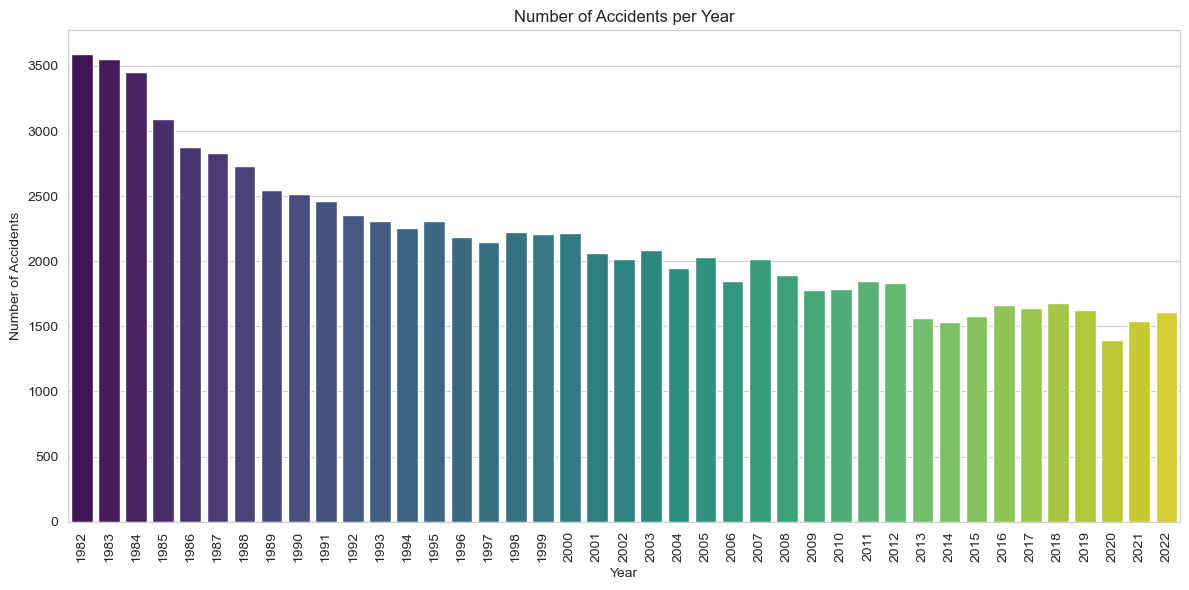

In [43]:
# using Bar Plot to determine Number of Accidents per Year

# Filter out years 1948 to 1981 since they have 0 values
filtered_df = aviation_df[aviation_df['Year'] >= 1982]

# Create the plot
plt.figure(figsize=(12, 6))
sns.countplot(x='Year', data=filtered_df, palette='viridis')

# Setting plot title and labels
plt.title('Number of Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=90)

# Display the plot
plt.tight_layout()
plt.show()

* It can be seen that accidents in eroplanes have been reduing per year 

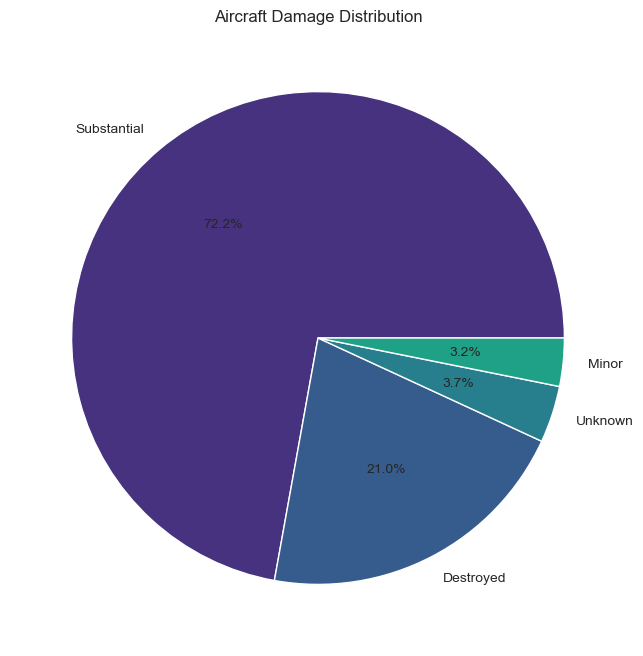

In [44]:

#Pie Chart for Aircraft Damage
plt.figure(figsize=(8, 8))
aviation_df['Aircraft.damage'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('viridis'))
plt.title('Aircraft Damage Distribution')
plt.ylabel('')
plt.show()

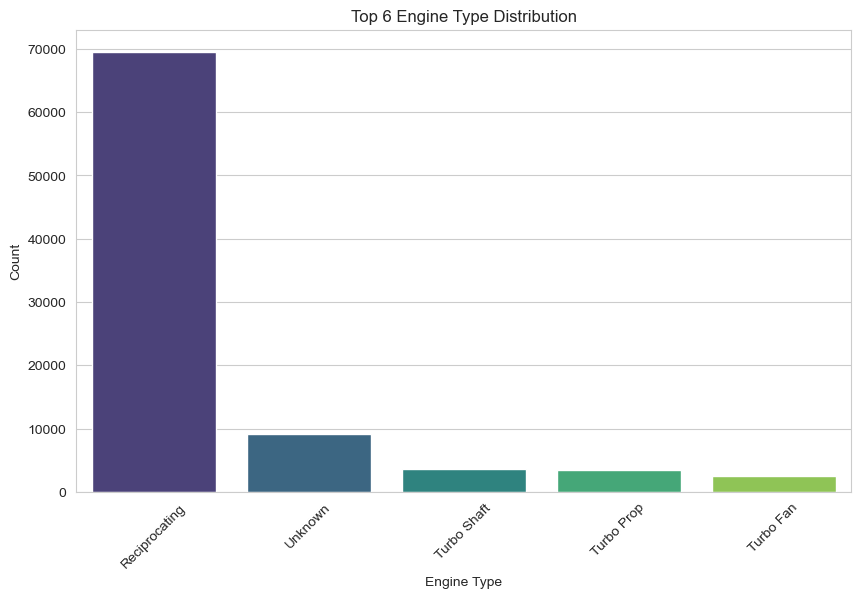

In [45]:

# Get the top six engine types
top_engine_types = aviation_df['Engine.Type'].value_counts().nlargest(5).index

# Filter the DataFrame to include only the top six engine types
filtered_df = aviation_df[aviation_df['Engine.Type'].isin(top_engine_types)]

# Bar Plot for Engine Type Distribution (first six)
plt.figure(figsize=(10, 6))
sns.countplot(x='Engine.Type', data=filtered_df, palette='viridis', order=top_engine_types)
plt.title('Top 6 Engine Type Distribution')
plt.xlabel('Engine Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


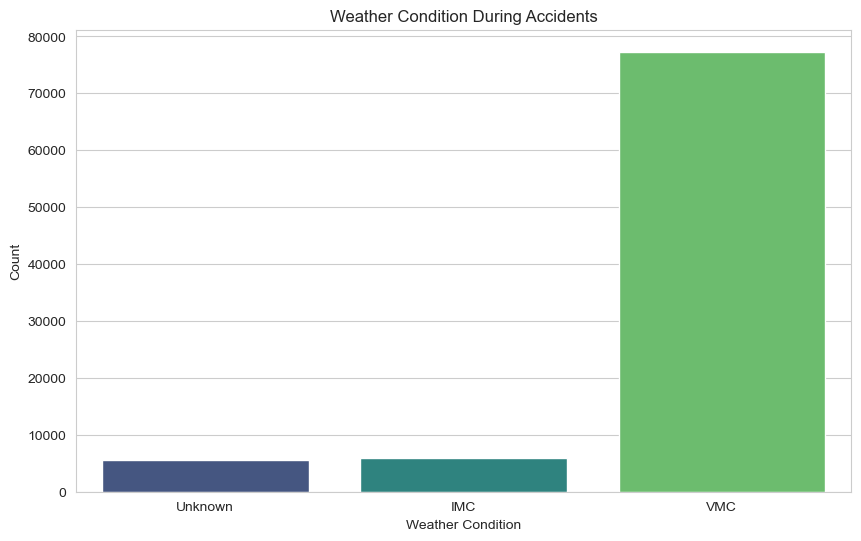

In [46]:
#Count Plot for Weather Condition
plt.figure(figsize=(10, 6))
sns.countplot(x='Weather.Condition', data=aviation_df, palette='viridis')
plt.title('Weather Condition During Accidents')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.show()

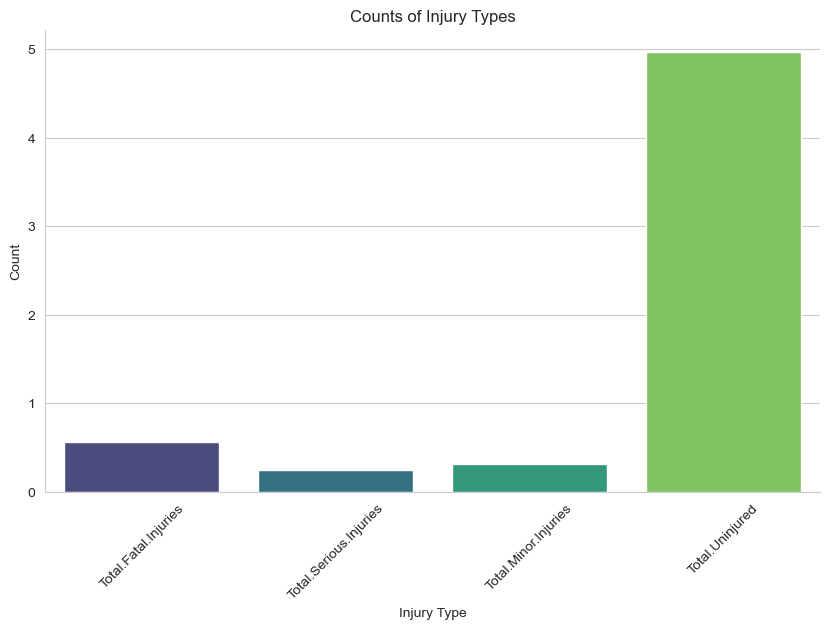

In [47]:

# Create a grouped bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='variable', y='value', data=aviation_df[numeric_columns].melt(), palette='viridis', ci=None)
plt.title('Counts of Injury Types')
plt.xlabel('Injury Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.gca().spines['top'].set_visible(False)  
plt.gca().spines['right'].set_visible(False) 
plt.show()


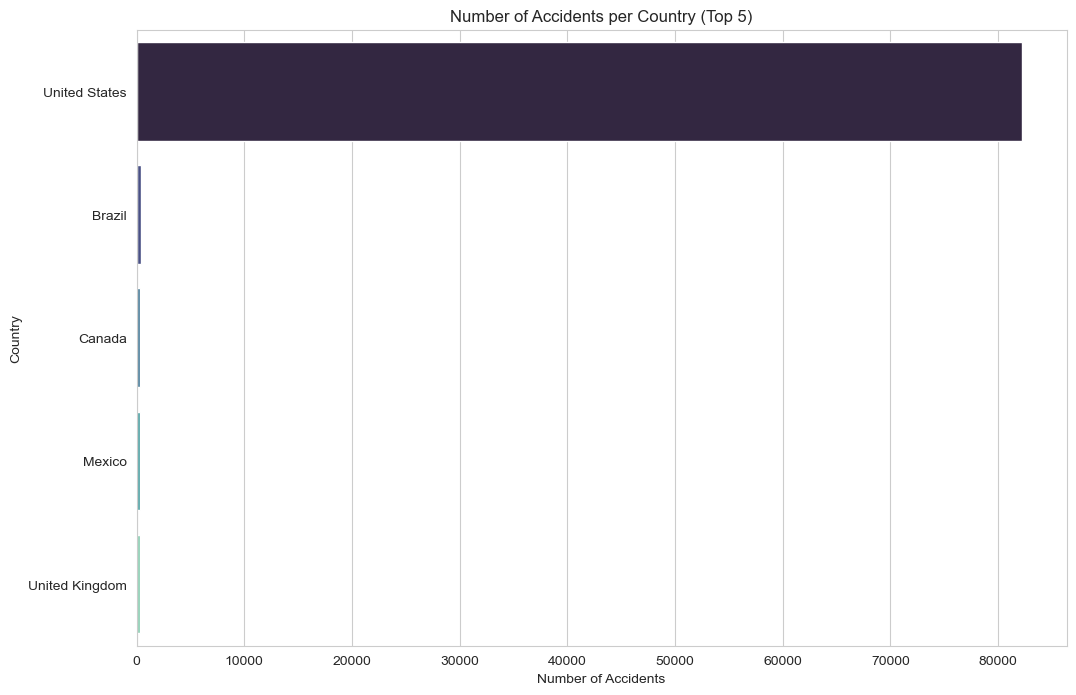

In [48]:
# Get number of accidents per country
accidents_per_country = aviation_df['Country'].value_counts().head(5)  # Select top 5 countries

# Create a figure and axis object
f = plt.figure(figsize=(12, 8))
ax = f.add_subplot(111)

# Create the count plot using seaborn
sns.barplot(y=accidents_per_country.index, x=accidents_per_country.values, palette='mako', ax=ax)
ax.set_title('Number of Accidents per Country (Top 5)')
ax.set_xlabel('Number of Accidents')
ax.set_ylabel('Country')

plt.show()

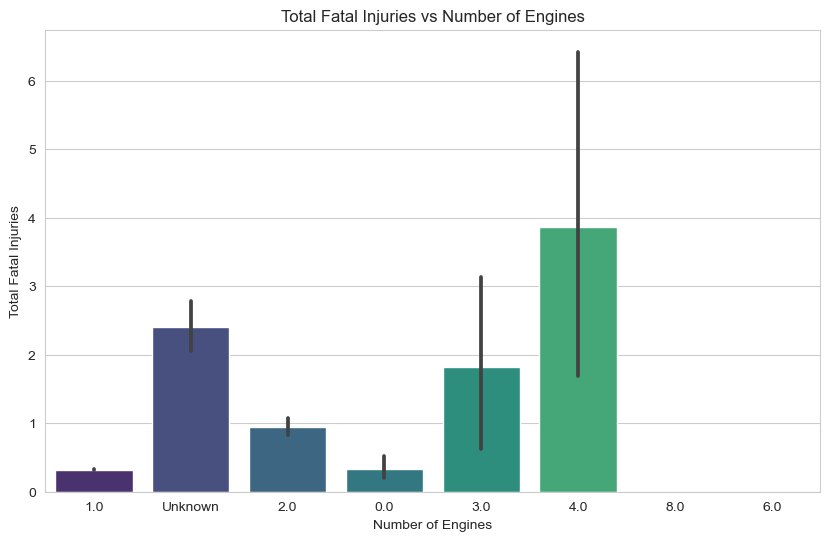

In [49]:
# Create a bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Number.of.Engines', y='Total.Fatal.Injuries', data=aviation_df, palette='viridis')
plt.title('Total Fatal Injuries vs Number of Engines')
plt.xlabel('Number of Engines')
plt.ylabel('Total Fatal Injuries')
plt.show()

In [50]:
# Create a bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Broad.phase.of.flight', y='Total.Fatal.Injuries', data=aviation_df, palette='viridis')

plt.title('Broad Phase of Flight vs Total Fatal Injuries')
plt.xlabel('Broad Phase of Flight')
plt.ylabel('Total Fatal Injuries')
plt.xticks(rotation=45)
plt.show()

ValueError: Could not interpret input 'Broad.phase.of.flight'

<Figure size 1000x600 with 0 Axes>

In [ ]:
aviation_df.columns

Index(['Investigation.Type', 'Location', 'Country', 'Latitude', 'Longitude',
       'Injury.Severity', 'Aircraft.damage', 'Make', 'Model', 'Amateur.Built',
       'Number.of.Engines', 'Engine.Type', 'Purpose.of.flight',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Report.Status', 'Year'],
      dtype='object')